# DCGAN on MNIST

1. [Setup](#1.-Setup)
2. [Load MNIST](#2.-Load-MNIST)
3. [DCGAN](#3.-DCGAN)  
3.1 [Training](#3.1-Training)  
3.2 [Image generation](#3.2-Image-generation)

## 1. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

from gans import DCGAN
from vis import grid_vis

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
print(f'sys.version: {sys.version}')
print(f'numpy.__version__: {np.__version__}')
print(f'tf.__version__: {tf.__version__}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
numpy.__version__: 1.15.3
tf.__version__: 1.11.0


## 2. Load MNIST

In [3]:
IMG_H = 28
IMG_W = 28
IMG_C = 1

X_train: (60000, 28, 28, 1) float64 [-1.0, 1.0]


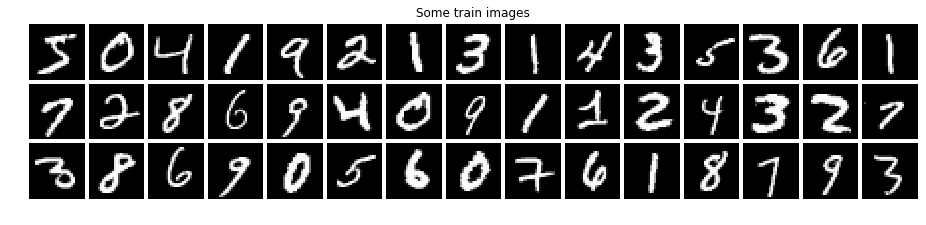

In [4]:
(X_train, y_train), _ = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, IMG_H, IMG_W, IMG_C) # NHWC
X_train = X_train / 255.   # [0., 1.]
X_train = 2 * X_train - 1  # [-1., 1.]

print('X_train: ', end='')
print(X_train.shape, X_train.dtype, end=' ')
print(f'[{X_train.min()}, {X_train.max()}]')

grid_vis(X_train, rows=3, plt_title='Some train images')

## 3. DCGAN

In [5]:
Z_DIM = 50
EPOCHS = 5
BATCH_SIZE = 128
PLOT_EVERY = 1

In [6]:
dc_gan = DCGAN(z_dim=Z_DIM, img_h=IMG_H, img_w=IMG_W, img_c=IMG_C)
generate_images = dc_gan.generate_images(tf.placeholder(tf.int32, 
                                                        name='imgs_to_generate'))
classify_images = dc_gan.discriminator(tf.placeholder(tf.float64,
                                                      shape=[None, IMG_H, IMG_W, IMG_C],
                                                      name='imgs_to_classify'))

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    generated_images = sess.run(generate_images,
                                feed_dict={
                                    'imgs_to_generate:0': 50
                                })
    logits_for_generated_images = sess.run(classify_images,
                                           feed_dict={
                                               'imgs_to_classify:0': generated_images
                                           })

(50, 28, 28, 1)
(50, 1)


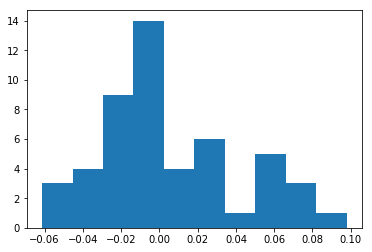

In [8]:
print(generated_images.shape)
print(logits_for_generated_images.shape)
plt.figure()
plt.hist(logits_for_generated_images.flatten())
plt.show()

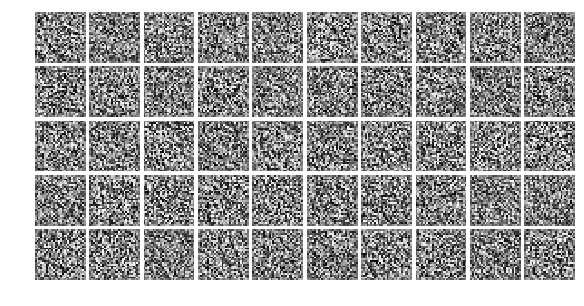

In [9]:
grid_vis(generated_images, 
         img_h=IMG_H, img_w=IMG_W, img_c=IMG_C,
         rows=5, cols=10)

### 3.1 Training

### 3.2 Image generation